In [97]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib as plt 
import seaborn as sns

In [98]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

In [99]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Loan_status is the variable to be predicted

We start with differenciating the categorical and numerical variables.

categotircal - gender,married,education,self_employed,loan_status

numereical - applicant_income, coapplicant_income, loan_amount, loan_amount_term

doubtful - dependents, credit_history.
ps - credit history tells whether the credit history guidelines have been met or not, hence it comes under categorical(true false type)

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Null values : credit_history > self_employed > gender > dependents 

In [101]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [102]:
train_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [103]:
train_df.describe(include = ['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001207,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## assumptions based on initial analysis

### Completing - deciding which variables need to be complted as they may have a direct impact on the results - 

* self employed and credit history(important) features may be completed.
* Loan amount term is essential and must be completed or the nan valued rows may be dropped

### Correcting - identifying the variables that may not have a direct impact on our prediction, because of high number of nulls or maybe because of the type of hte information.

* We may drop the loan account number variable.

### Creating - 

* Total income = applicant income + coapp income 
* emi = loan_amount*1000/loan amount term (since loan amount is in 1000s)
* clearance = total income - emi
--- we also need to include the parameter of number of dependents

### Classification  - based on problem description



### Analysis by Pivoting 

#### Data can be pivoted about categorical,ordinal(Categorical with natural ordering) or discrete(part of numerical, counter part is continuous) variables only.
https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/

Options - Self_employed, property_area, married, education, --dependents(ordinal) #rest all are categorical

Let us pivot all of these one by one - 


# self_employed
train_df[['Self_Employed','Loan_Status']].groupby(['Self_Employed'],as_index=False).mean()

An error has occoured because our target variable for mean is not numerical. Hence we need to convert it into numerical first. We can do this by replacing all 'Y' with 1 and 'N' with 0.

In [104]:
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y':1,'N':0}).astype(int)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Let us get back to pivoting


In [105]:
train_df[['Self_Employed','Loan_Status']].groupby(['Self_Employed'],as_index = False).mean()

,Self_Employed,Loan_Status
0,No,0.686000
1,Yes,0.682927


In [106]:
train_df['Loan_Status'].mean()

0.6872964169381107

We conclude from this that the self employment status is not a relevant feature as the loan approvement status is almost the same for both the groups.

In [107]:
# property area
train_df[['Property_Area','Loan_Status']].groupby(['Property_Area'],as_index =False).mean().sort_values(by = 'Loan_Status',ascending = False)


,Property_Area,Loan_Status
1,Semiurban,0.768240
2,Urban,0.658416
0,Rural,0.614525


We observe that the property locstion has some impact on the loan approvement status.


In [108]:
#Married
train_df[['Married','Loan_Status']].groupby(['Married'],as_index =False).mean().sort_values(by = 'Loan_Status',ascending = False)


,Married,Loan_Status
1,Yes,0.716080
0,No,0.629108


Marriage status affect loan approvement status.

In [109]:
#Dependents
train_df[['Dependents','Loan_Status']].groupby(['Dependents'],as_index =False).mean().sort_values(by = 'Loan_Status',ascending = False)


,Dependents,Loan_Status
2,2,0.752475
0,0,0.689855
1,1,0.647059
3,3+,0.647059


In [110]:
#Education
train_df[['Education','Loan_Status']].groupby(['Education'],as_index =False).mean().sort_values(by = 'Loan_Status',ascending = False)


,Education,Loan_Status
0,Graduate,0.708333
1,Not Graduate,0.611940


Education hs a great impact on loan approval.

### Plotting

In [111]:
from matplotlib import pyplot as plt

#### Histograms - They are used for plotting continuous numerical data like age or income that can split into bands or intervals. 

81000


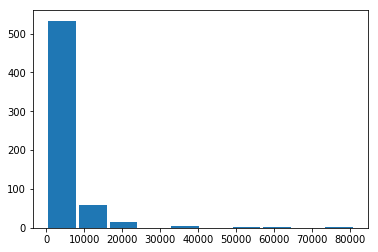

In [112]:
#Plotting income 
print(train_df['ApplicantIncome'].max())
plt.hist(train_df['ApplicantIncome'],bins = 10,histtype = 'bar',rwidth = 0.9)
plt.show()

We observe that the distribution of income is very skewed, and hence the graph obtained is not so useful. It will be good to see the distribution of income in the densely populated region from 0 to 30000.

In [113]:
not_dense = []
for i in range(0,len(train_df['ApplicantIncome'])):
    if train_df['ApplicantIncome'][i]>30000:
        not_dense.append( train_df['ApplicantIncome'][i])
not_dense

[39999, 51763, 33846, 39147, 63337, 81000, 37719]

This verifies our observation

In [114]:
dense = []
for i in range(0,len(train_df['ApplicantIncome'])):
    if train_df['ApplicantIncome'][i]<30000 and train_df['Loan_Status'][i]==1:
        dense.append( train_df['ApplicantIncome'][i])
len(dense)

417

In [115]:
dense2 = []
for i in range(0,len(train_df['ApplicantIncome'])):
    if train_df['ApplicantIncome'][i]<30000 and train_df['Loan_Status'][i]==0:
        dense2.append( train_df['ApplicantIncome'][i])
len(dense2)

190

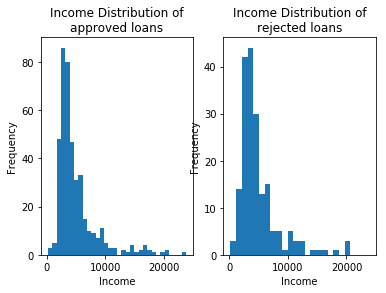

In [116]:
#print(dense.max())
ax1 = plt.subplot(121)
plt.hist(dense,bins = 'auto',histtype = 'bar',rwidth = 1)
plt.title('Income Distribution of\napproved loans')
plt.xlabel('Income')
plt.ylabel('Frequency')
ax2 = plt.subplot(122,sharex=ax1) 
plt.hist(dense2,bins='auto',histtype='bar',rwidth=1)
plt.title('Income Distribution of\nrejected loans')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


Applicant income as an individual parameter does not give a lot of inference to the data,so let us now try and club it with the number of dependents.

Before that, let us also analyze the data for co-applicant income.

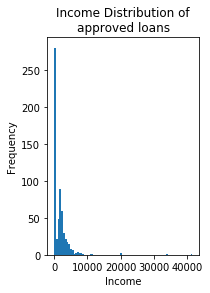

In [117]:
ax1 = plt.subplot(121)
plt.hist(train_df['CoapplicantIncome'],bins = 'auto',histtype = 'bar',rwidth = 1)
plt.title('Income Distribution of\napproved loans')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

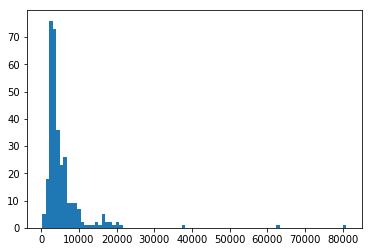

In [118]:
plt.hist(train_df['ApplicantIncome'].iloc[299:614],bins = 'auto')
plt.show()

We see no correlation between the applicant income and the loan status. Let us add a new variable to this analysis of income.

In [119]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [120]:
train_df['Total_income'] = train_df['ApplicantIncome']+train_df['CoapplicantIncome']

In [121]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


/home/kartik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


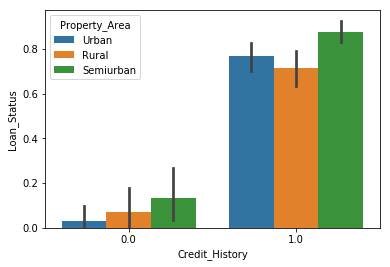

In [122]:
sns.barplot(x='Credit_History',y='Loan_Status',hue='Property_Area',data=train_df)

Credit_hstory has a very strong correlation with loan status

/home/kartik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


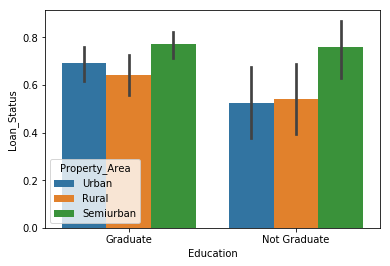

In [123]:
sns.barplot(x='Education',y='Loan_Status',hue='Property_Area',data=train_df)

/home/kartik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


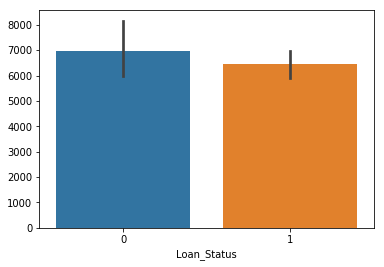

In [124]:
emi = train_df['Total_income'] - (train_df['LoanAmount']/train_df['Loan_Amount_Term']*1000)
sns.barplot(x='Loan_Status',y=emi,data= train_df)

In [125]:
train_df['Total_income'].mean()

7024.705081414722

We need to do the following before applying the model - 
    * divide applicant income and coapplicant income into categories (loan_amount)
    * convert all categories to numerical -(self employed, married, gender,property_area)    

In [126]:
train_df['Self_Employed'] = train_df['Self_Employed'].map({'Yes':1,'No':0})
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [127]:
train_df['Married'] = train_df['Married'].map({'Yes':1,'No':0})
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [128]:
train_df['Gender'] = train_df['Gender'].map({'Male':1,'Female':0})
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,1.0,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,1.0,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,1.0,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,1.0,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,1.0,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [129]:
train_df['Self_Employed'].unique()

array([ 0.,  1., nan])

## Handling missing values - 

### Drop - dropna() function --- few missing values only
### Replace (with mean, median or mode) - fillna() function
### Impute -  Impute() function from sklearn

In [130]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_income          0
dtype: int64

Credit history is an important variable, we need to impute it with apropriate values.


In [131]:
train_df.Credit_History.unique()

array([ 1.,  0., nan])

In [132]:
#since credit history has only one type of outlier, let us put in the mode for the data.
train_df.Credit_History.mode()

0    1.0
dtype: float64

In [133]:
train_df.Credit_History = train_df.Credit_History.replace(np.NaN,0)

In [134]:
train_df.Credit_History.unique()

array([1., 0.])

In [135]:
train_df.Married.unique()

array([ 0.,  1., nan])

In [136]:
train_df.Married = train_df.Married.replace(np.NaN,0)

In [137]:
train_df.Married.unique()

array([0., 1.])

In [138]:
train_df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [139]:
train_df.LoanAmount = train_df.LoanAmount.replace(np.NaN,train_df.LoanAmount.mode())

In [140]:
train_df.Loan_Amount_Term.unique()


array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

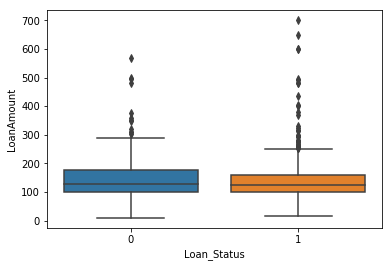

In [141]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data = train_df)

LoanAmount has large number of outliers and hence mean is not a good solution.

In [142]:
train_df.LoanAmount.mean()

146.36762225969645

In [143]:
train_df.Loan_Amount_Term = train_df.Loan_Amount_Term.replace(np.NaN,train_df.LoanAmount.mean())


Let us group Loan amount into three categories as high low and medium, and similarly repeat the exercise for 

In [144]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_df['Income_bin']=pd.cut(train_df['ApplicantIncome'],bins,labels=group)


In [145]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_df['Coapplicant_Income_bin']=pd.cut(train_df['CoapplicantIncome'],bins,labels=group)


In [146]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Income_bin,Coapplicant_Income_bin
0,LP001002,1.0,0.0,0,Graduate,0.0,5849,0.0,120.0,360.0,1.0,Urban,1,5849.0,High,NaN
1,LP001003,1.0,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,High,Average
2,LP001005,1.0,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,Average,NaN
3,LP001006,1.0,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,Average,Average
4,LP001008,1.0,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,High,NaN


In [147]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
test_df['Income_bin']=pd.cut(test_df['ApplicantIncome'],bins,labels=group)
bins=[0,1000,3000,42000]
group=['Low','Average','High']
test_df['Coapplicant_Income_bin']=pd.cut(test_df['CoapplicantIncome'],bins,labels=group)

In [148]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bin,Coapplicant_Income_bin
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,High,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Average,Average
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,High,Average
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Low,Average
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Average,NaN


In [149]:
train_df['Coapplicant_Income_bin'] = train_df.Coapplicant_Income_bin.replace(np.NaN,0)

In [150]:
test_df.LoanAmount = test_df.LoanAmount.replace(np.NaN,train_df.LoanAmount.mode())
test_df.Loan_Amount_Term = test_df.Loan_Amount_Term.replace(np.NaN,360)
test_df.Married = test_df.Married.replace(np.NaN,0)
test_df.Credit_History = test_df.Credit_History.replace(np.NaN,0)
test_df['Coapplicant_Income_bin'] = test_df.Coapplicant_Income_bin.replace(np.NaN,0)

In [151]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bin,Coapplicant_Income_bin
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,High,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Average,Average
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,High,Average
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban,Low,Average
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Average,0


In [152]:
test_df['Self_Employed'] = test_df['Self_Employed'].map({'Yes':1,'No':0})
test_df['Married'] = test_df['Married'].map({'Yes':1,'No':0})
test_df['Gender'] = test_df['Gender'].map({'Male':1,'Female':0})

In [153]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bin,Coapplicant_Income_bin
0,LP001015,1.0,1,0,Graduate,0.0,5720,0,110.0,360.0,1.0,Urban,High,0
1,LP001022,1.0,1,1,Graduate,0.0,3076,1500,126.0,360.0,1.0,Urban,Average,Average
2,LP001031,1.0,1,2,Graduate,0.0,5000,1800,208.0,360.0,1.0,Urban,High,Average
3,LP001035,1.0,1,2,Graduate,0.0,2340,2546,100.0,360.0,0.0,Urban,Low,Average
4,LP001051,1.0,0,0,Not Graduate,0.0,3276,0,78.0,360.0,1.0,Urban,Average,0


In [154]:
train_df=train_df.drop('Loan_ID',axis=1)
test_df=test_df.drop('Loan_ID',axis=1)

In [155]:
train_df=train_df.drop('ApplicantIncome',axis=1)
test_df=test_df.drop('ApplicantIncome',axis=1)
train_df=train_df.drop('CoapplicantIncome',axis=1)
test_df=test_df.drop('CoapplicantIncome',axis=1)

In [156]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Income_bin,Coapplicant_Income_bin
0,1.0,0.0,0,Graduate,0.0,120.0,360.0,1.0,Urban,1,5849.0,High,0
1,1.0,1.0,1,Graduate,0.0,128.0,360.0,1.0,Rural,0,6091.0,High,Average
2,1.0,1.0,0,Graduate,1.0,66.0,360.0,1.0,Urban,1,3000.0,Average,0
3,1.0,1.0,0,Not Graduate,0.0,120.0,360.0,1.0,Urban,1,4941.0,Average,Average
4,1.0,0.0,0,Graduate,0.0,141.0,360.0,1.0,Urban,1,6000.0,High,0


In [157]:
train_df=train_df.drop('LoanAmount',axis=1)
test_df=test_df.drop('LoanAmount',axis=1)
train_df=train_df.drop('Loan_Amount_Term',axis=1)
test_df=test_df.drop('Loan_Amount_Term',axis=1)
train_df = train_df.drop('Total_income',axis = 1)

In [158]:
train_df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin
0,1.0,0.0,0,Graduate,0.0,1.0,Urban,1,High,0
1,1.0,1.0,1,Graduate,0.0,1.0,Rural,0,High,Average
2,1.0,1.0,0,Graduate,1.0,1.0,Urban,1,Average,0
3,1.0,1.0,0,Not Graduate,0.0,1.0,Urban,1,Average,Average
4,1.0,0.0,0,Graduate,0.0,1.0,Urban,1,High,0


In [159]:
train_df.Self_Employed.mode()

0    0.0
dtype: float64

In [160]:
train_df.Self_Employed = train_df.Self_Employed.replace(np.NaN,0)


In [161]:
test_df.Self_Employed = test_df.Self_Employed.replace(np.NaN,0)

In [162]:
train_df.Dependents = train_df.Dependents.replace(np.NaN,0)
test_df.Dependents = test_df.Dependents.replace(np.NaN,0)

In [163]:
train_df.Gender = train_df.Gender.replace(np.NaN,1)
test_df.Gender = test_df.Gender.replace(np.NaN,1)

In [164]:
X = train_df.drop('Loan_Status',1)
y = train_df.Loan_Status

In [165]:
X=pd.get_dummies(X)
train=pd.get_dummies(train_df)
test=pd.get_dummies(test_df)

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [168]:
train_df.isnull().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
Credit_History            0
Property_Area             0
Loan_Status               0
Income_bin                0
Coapplicant_Income_bin    0
dtype: int64

In [169]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
pred_cv = model.predict(x_cv)

In [171]:
accuracy_score(y_cv,pred_cv)

0.7567567567567568

In [172]:
pred_test = model.predict(test)

In [173]:
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')

In [174]:
submission=pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [175]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [176]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')